In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
benin = pd.read_csv("data/benin-clean.csv")
sierra_leone = pd.read_csv("data/sierrialeone-clean.csv")
togo = pd.read_csv("data/togo-clean.csv")

In [10]:
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into one DataFrame
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModB,Comments,GHI_zscore,DNI_zscore,DHI_zscore,ModA_zscore,ModB_zscore,WS_zscore,WSgust_zscore,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,26.2,NaN,-0.730102,-0.639591,-0.733873,-0.723749,-0.723088,-1.322831,-1.187312,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,26.2,NaN,-0.729800,-0.639591,-0.733873,-0.723749,-0.723088,-1.322831,-1.384442,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,26.2,NaN,-0.729800,-0.639591,-0.733873,-0.723749,-0.723088,-1.135736,-0.842334,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,26.3,NaN,-0.729800,-0.639209,-0.733243,-0.723749,-0.723088,-1.198101,-1.039464,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,26.3,NaN,-0.729498,-0.639209,-0.733243,-0.723749,-0.723088,-1.260466,-1.039464,Benin


C:\Users\Yohannes\AppData\Local\Temp\ipykernel_22944\19129799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette="Set2")


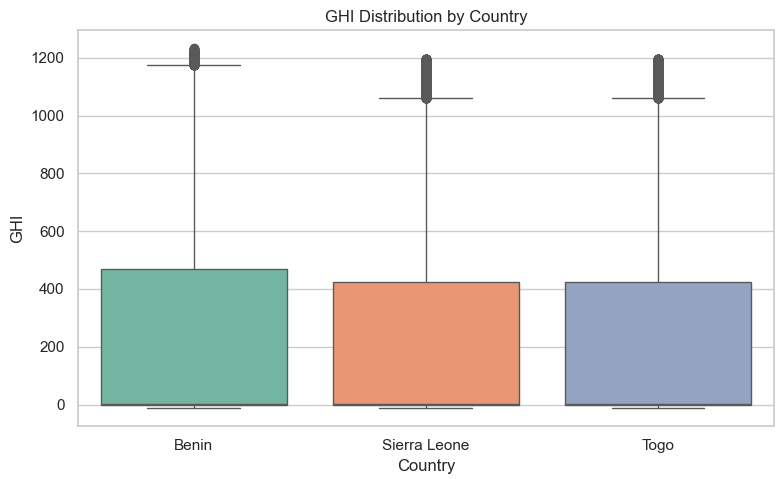

C:\Users\Yohannes\AppData\Local\Temp\ipykernel_22944\19129799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette="Set2")


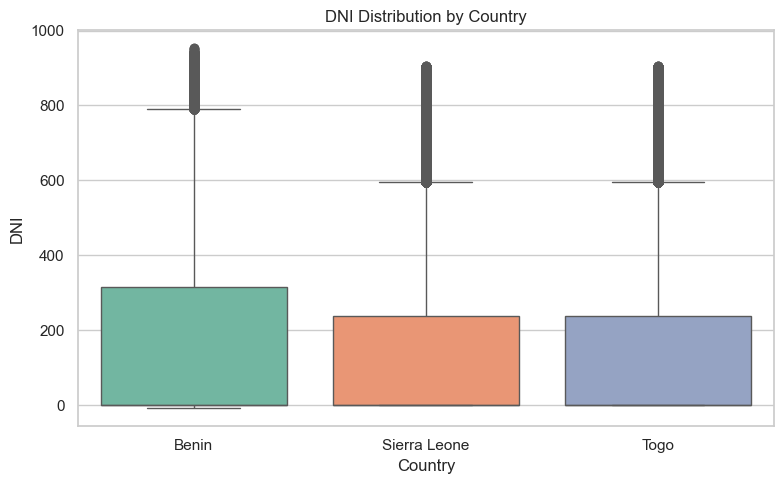

C:\Users\Yohannes\AppData\Local\Temp\ipykernel_22944\19129799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette="Set2")


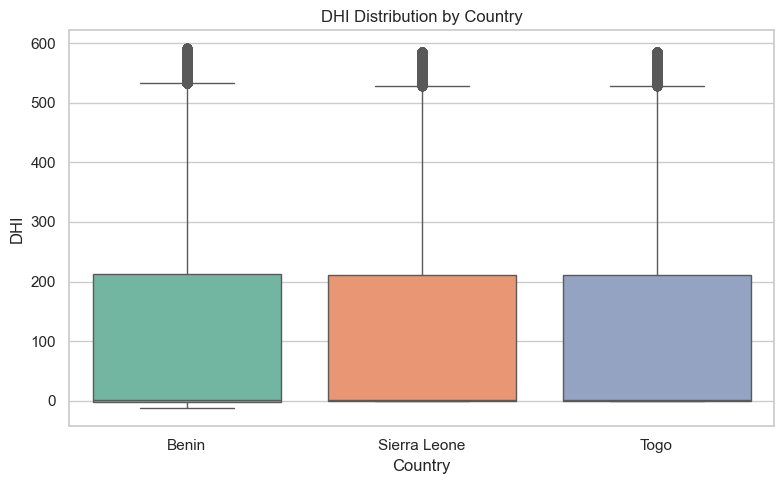

In [7]:
sns.set(style="whitegrid")
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all, palette="Set2")
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()

In [8]:
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


In [11]:
# Group by country and calculate summary stats
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

# Round for readability
summary = summary.round(2)

# Display
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  151.57  
Togo          151.57

In [13]:
from scipy.stats import f_oneway

# Extract GHI values for each country
ghi_benin = df_all[df_all['Country'] == 'Benin']['GHI']
ghi_sierra = df_all[df_all['Country'] == 'Sierra Leone']['GHI']
ghi_togo = df_all[df_all['Country'] == 'Togo']['GHI']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

print("ANOVA results:")
print("F-statistic:", round(f_stat, 3))
print("p-value:", round(p_value, 4))


ANOVA results:
F-statistic: 256.267
p-value: 0.0


summary

- Benin shows the highest average GHI, making it promising for solar investment.
- Sierra Leone has moderate solar potential but with more variability.
- Togo has the lowest median GHI among the three